<a href="https://colab.research.google.com/github/iuri/bci/blob/main/EEG_BCI200_Motor_Imagery_Analysis_Classification_Dataset_1_EDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To install mne library
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 5.9 MB/s 


In [2]:
# %%
import numpy as np
import scipy.io
import mne

Descricao do Dataset https://physionet.org/content/eegmmidb/1.0.0/


Referencia: https://github.com/wmvanvliet/neuroscience_tutorials/blob/master/eeg-bci/3.%20Imagined%20movement.ipynb


In [3]:
# Connect to GDrive
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [4]:
# To read EDF 
raw = mne.io.read_raw_edf('gdrive/MyDrive/TCC/Datasets/eegmmidb/S002/S002R03.edf', preload=True)

Extracting EDF parameters from /content/gdrive/MyDrive/TCC/Datasets/eegmmidb/S002/S002R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


Adicionar este trecho de codigo para isolar as variaveis e dados de analise

In [5]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

Each annotation includes one of three codes (T0, T1, or T2):

T0 corresponds to rest

T1 corresponds to onset of motion (real or imagined) of:
  the left fist (in runs 3, 4, 7, 8, 11, and 12)
  both fists (in runs 5, 6, 9, 10, 13, and 14)

T2 corresponds to onset of motion (real or imagined) of
the right fist (in runs 3, 4, 7, 8, 11, and 12)
both feet (in runs 5, 6, 9, 10, 13, and 14)

In [6]:
events=mne.events_from_annotations(raw)

Used Annotations descriptions: ['T0', 'T1', 'T2']


In [7]:
event_dict={
    'left':2,
    'right':3
}

In [8]:
events

(array([[    0,     0,     1],
        [  656,     0,     2],
        [ 1312,     0,     1],
        [ 1968,     0,     3],
        [ 2624,     0,     1],
        [ 3280,     0,     3],
        [ 3936,     0,     1],
        [ 4592,     0,     2],
        [ 5248,     0,     1],
        [ 5904,     0,     2],
        [ 6560,     0,     1],
        [ 7216,     0,     3],
        [ 7872,     0,     1],
        [ 8528,     0,     3],
        [ 9184,     0,     1],
        [ 9840,     0,     2],
        [10496,     0,     1],
        [11152,     0,     3],
        [11808,     0,     1],
        [12464,     0,     2],
        [13120,     0,     1],
        [13776,     0,     2],
        [14432,     0,     1],
        [15088,     0,     3],
        [15744,     0,     1],
        [16400,     0,     2],
        [17056,     0,     1],
        [17712,     0,     3],
        [18368,     0,     1],
        [19024,     0,     2]]), {'T0': 1, 'T1': 2, 'T2': 3})

In [9]:
events[0][0:20]

array([[    0,     0,     1],
       [  656,     0,     2],
       [ 1312,     0,     1],
       [ 1968,     0,     3],
       [ 2624,     0,     1],
       [ 3280,     0,     3],
       [ 3936,     0,     1],
       [ 4592,     0,     2],
       [ 5248,     0,     1],
       [ 5904,     0,     2],
       [ 6560,     0,     1],
       [ 7216,     0,     3],
       [ 7872,     0,     1],
       [ 8528,     0,     3],
       [ 9184,     0,     1],
       [ 9840,     0,     2],
       [10496,     0,     1],
       [11152,     0,     3],
       [11808,     0,     1],
       [12464,     0,     2]])

In [10]:
events[0][1]

array([656,   0,   2])

<ipython-input-11-34ece270eb3a>:1: RuntimeWarning: event 1 missing from event_id will be ignored
  fig=mne.viz.plot_events(events[0],event_id=event_dict,sfreq=raw.info['sfreq'],first_samp=raw.first_samp)


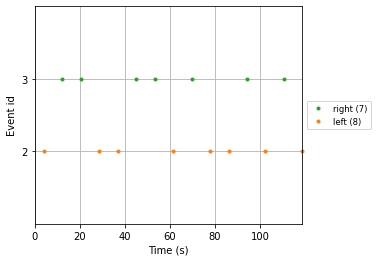

In [11]:
fig=mne.viz.plot_events(events[0],event_id=event_dict,sfreq=raw.info['sfreq'],first_samp=raw.first_samp)

In [12]:
epoch=mne.Epochs(raw,events[0],event_id=[2,3],tmin=-0.2,tmax=1.9)

Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [13]:
epoch.get_data().shape

Using data from preloaded Raw for 15 events and 337 original time points ...
0 bad epochs dropped


(15, 64, 337)

In [14]:
labels=epoch.events[:-1]

In [15]:
labels

array([[  656,     0,     2],
       [ 1968,     0,     3],
       [ 3280,     0,     3],
       [ 4592,     0,     2],
       [ 5904,     0,     2],
       [ 7216,     0,     3],
       [ 8528,     0,     3],
       [ 9840,     0,     2],
       [11152,     0,     3],
       [12464,     0,     2],
       [13776,     0,     2],
       [15088,     0,     3],
       [16400,     0,     2],
       [17712,     0,     3]])

In [16]:
labels.shape

(14, 3)

In [17]:
# evoked_1=epoch['1'].average()
evoked_2=epoch['2'].average()
evoked_3=epoch['3'].average()


In [18]:
dicts={
    'left':evoked_2,
    'right':evoked_3
}

combining channels using "gfp"
combining channels using "gfp"


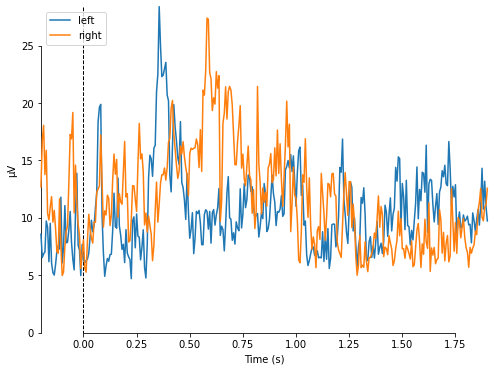

[<Figure size 576x432 with 1 Axes>]

In [19]:
mne.viz.plot_compare_evokeds(dicts)

In [20]:
def read_data(path):
  raw = mne.io.read_raw_edf(path, preload=True)
  raw.set_eeg_reference()
  events=mne.events_from_annotations(raw)
  epoch=mne.Epochs(raw,events[0],event_id=[2,3], tmin=-0.2,tmax=1.9)
  labels=epoch.events[:,-1]
  features=epoch.get_data()
  return labels,features,epoch


In [21]:
path='gdrive/MyDrive/TCC/Datasets/eegmmidb/S015/S015R03.edf'
label,features,epoch=read_data(path)

Extracting EDF parameters from /content/gdrive/MyDrive/TCC/Datasets/eegmmidb/S015/S015R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 337 original time points ...
0 bad epochs dropped


In [22]:
features.shape, labels.shape

((15, 64, 337), (14, 3))

In [23]:
# evoked_1=epoch['1'].average()
evoked_2=epoch['2'].average()
evoked_3=epoch['3'].average()

combining channels using "gfp"
combining channels using "gfp"


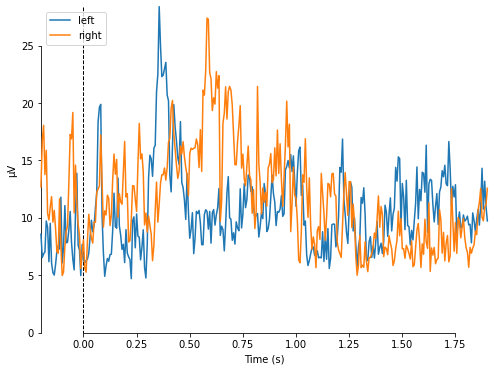

[<Figure size 576x432 with 1 Axes>]

In [24]:
mne.viz.plot_compare_evokeds(dicts)

In [38]:
sample_rate = raw.info["sfreq"]
EEG = raw.get_data() # EEG = m['cnt'].T
# nchannels=len(raw.ch_names)
# nsamples=raw.n_times
nchannels, nsamples = EEG.shape

raw.rename_channels({ch: ch.replace('.', '') for ch in raw.ch_names})
channel_names = raw.ch_names

# event_onsets = m['mrk'][0][0][0]
# event_codes = m['mrk'][0][0][1]
event_onsets=[]
event_codes=[]
for elem in events[0]:
  # print(elem[2])
  if elem[2]!=1:
    event_onsets.append(elem[0])
    event_codes.append(elem[2])
event_onsets = np.array([event_onsets], dtype=np.int16)
event_codes = np.array([event_codes], dtype=np.int16)

labels = np.zeros((1, nsamples), int) 
labels[0, event_onsets] = event_codes

cl_lab = ['left', 'right']
cl1 = cl_lab[0] # esquerda
cl2 = cl_lab[1] # direita

nclasses = len(cl_lab)
nevents = len(event_onsets)

In [26]:
print('Forma do EEG', EEG.shape)
print('Taxa de amostragem', sample_rate)
print('Quantidade de canais', nchannels)
print('Nomes dos Canais', channel_names)
print('Quantidade de eventos', len(event_onsets))
print('Codigos de Eventos', np.unique(event_codes)) # esquerda -1 e direita 1 
print('Classe de rotulos', cl_lab)
print('Quantidade de classes', nclasses)

Forma do EEG (64, 19680)
Taxa de amostragem 160.0
Quantidade de canais 64
Nomes dos Canais ['Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2', 'Fc4', 'Fc6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'Cp5', 'Cp3', 'Cp1', 'Cpz', 'Cp2', 'Cp4', 'Cp6', 'Fp1', 'Fpz', 'Fp2', 'Af7', 'Af3', 'Afz', 'Af4', 'Af8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'Ft7', 'Ft8', 'T7', 'T8', 'T9', 'T10', 'Tp7', 'Tp8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'Po7', 'Po3', 'Poz', 'Po4', 'Po8', 'O1', 'Oz', 'O2', 'Iz']
Quantidade de eventos 1
Codigos de Eventos [2 3]
Classe de rotulos ['left', 'right']
Quantidade de classes 2


Os dados sao extraidos a partir de uma grande amostra: 59 eletrodos foram usados, espalhados por todo o couro cabeludo. 

O sujeito recebeu uma sugestão/estimulo externo e, em seguida, imaginou o movimento da mão direita ou o movimento dos pés.

Como pode ser visto no Homunculus, o movimento do pé é controlado no centro do córtex motor (o que torna difícil distinguir o pé esquerdo do direito), enquanto o movimento da mão é controlado mais lateralmente.

# Plotando os dados

O código abaixo corta os testes em duas classes. # Os cortes sao feitos no intervalo [0,5-2,5 s] após o início da sugestão.

In [39]:
# Dicionário para armazenar as tentativas, cada classe recebe uma entrada
trials = {}

# A janela de tempo (de amostras) para extrair cada tentativa (trial), 0.5 -- 2.5 segundos
win = np.arange(int(0.5*sample_rate), int(2.5*sample_rate))

# Tamanho da janela de tempo
nsamples = len(win)

# Iteracao  nas classes (direita, esquerda)
for cl, code in zip(cl_lab,np.unique(event_codes)):
  # Extrair eventos onsets das classes
  cl_onsets = event_onsets[event_codes == code]

  # alocar memoria para as amostras
  trials[cl] = np.zeros((nchannels, nsamples, len(cl_onsets)))

  # Extrair cada amostra
  for i, onset in enumerate(cl_onsets):
    trials[cl][:,:,i] = EEG[:, win+onset]
    
# Info aobre as dimensoes dos dados (canais X tempo X amostras - channels X time X trials )
print('Forma das amostras triasl[cl1]', trials[cl1].shape)  # esquerda 
print('Forma das amostras triasl[cl2]', trials[cl2].shape)  # direita




Forma das amostras triasl[cl1] (64, 320, 8)
Forma das amostras triasl[cl2] (64, 320, 7)


A caracteristica a ser buscada é frequência (uma diminuição na atividade), vamos plotar o PSD das tentativas de maneira semelhante aos dados do SSVEP.

O código abaixo define uma função que calcula o PSD (Power Spectral Density) para cada amostra teste (que sera utilizada posteriormente no codigo):

In [46]:
from matplotlib import mlab

def psd(trials):
  '''
  Calcula o PSD de cada amostra
  Parametros:
  ------------------
  amostras: 3d-array ( canais X PSD X amostras )
  Sinal EEG

  Retorna:
  ----------------
  amostras_PSD: 3d-array ( canais X PSD X trials)
    O PSD de cada amostra
  freqs: lista de floats
    Frequencias correspondentes aos PSD que foram processados (necessario para plotar o grafico)
  '''

  ntrials = trials.shape[2]
  trials_PSD = np.zeros((nchannels, 161, ntrials))

  # iteracao sobre amostras e canais
  for trial in range(ntrials):
   for ch in range(nchannels):
      # Calcular PSD
      (PSD, freqs) = mlab.psd(trials[ch,:,trial], NFFT=int(nsamples), Fs=sample_rate)
      trials_PSD[ch, :, trial] = PSD.ravel()
  return trials_PSD, freqs

In [47]:
psd_l, freqs = psd(trials[cl1])
psd_r, freqs = psd(trials[cl2])
trials_PSD = {cl1: psd_l, cl2: psd_r}

In [48]:
import matplotlib.pyplot as plt

def plot_psd(trials_PSD, freqs, chan_ind, chan_lab=None, maxy=None):
  '''
  Plota dados PSD calculados com a funcao psd()

  Parametros:
  ----------------
  trials: 3d-array
    Dados PSD, retornados pela funcao psd()
  freqs: lista de floats
    Lista de frequencias correspondentes aos PSD que foram definidos
  chan_ind: list de inteiros
    Indices de canais para plotar o grafico
  chan_lab: lista de strings
    (opcional) lista de nomes de cada canal
  maxy: float
    (opcional) limite no eixo y
  '''
  plt.figure(figsize=(12,5))
  nchans = len(chan_ind)

  # Maximo de 3 plotagens por linha
  nrows = int(np.ceil(nchans / 3))
  ncols = min(3, nchans)

  # Iteracao sobre canais
  for i,ch in enumerate(chan_ind):
    # Definir qual suplot para desenhar
    plt.subplot(nrows,ncols,i+1)

    # Plotar PSD para cada classe
    for c1 in trials.keys():
      plt.plot(freqs, np.mean(trials_PSD[c1][ch,:,:], axis=1), label=c1)

    # Ajutar decoracao do grafico
    plt.xlim(1,30)
    if maxy != None:
      plt.ylim(0,maxy)

    plt.grid()
    plt.xlabel('Frequency (Hz)')
    if chan_lab == None:
      plt.title('Channel %d' % (ch+1))
    else:
      plt.title(chan_lab[i])
    plt.legend()
  plt.tight_layout()
  

              

Um pico de atividade "mu" pode ser visto em cada canal para ambas as classes.

No hemisfério direito, o "mu" para o movimento da mão esquerda é menor do que para o movimento da mão direita devido ao ERD.

No eletrodo esquerdo, o "mu" para o movimento da mão direita é reduzido e no eletrodo central a atividade mu é aproximadamente igual para ambas as classes.

Isso está de acordo com a teoria de que a mão esquerda é controlada pelo hemisfério direito e os pés são controlados centralmente.

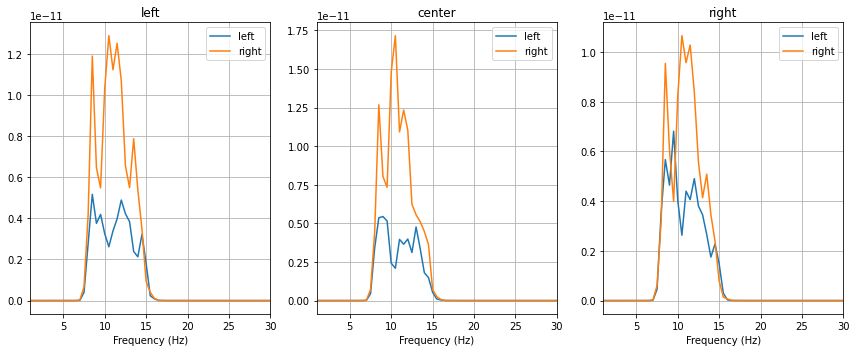

In [67]:
plot_psd(
    trials_PSD,
    freqs,
    [channel_names.index(ch) for ch in ['Fp1', 'Fpz', 'Fp2']],
    chan_lab=['left', 'center', 'right'],
)

# Classificar os dados
Foi utilizado um algoritmo de aprendizado de máquina para construir um modelo distingue entre o movimento da mão direita e do pé desse sujeito. Para fazer isso precisamos:

Encontre uma maneira de quantificar a quantidade de atividade "mu" presente numa amostra
Criar um modelo que descreva os valores esperados da atividade "mu" para cada classe
Finalmente teste este modelo em alguns dados não vistos para ver se ele pode prever o rótulo de classe correto

Seguindo um desenho clássico do BCI de Blankertz et al. [1] onde utilizam o logaritmo da variância do sinal numa determinada banda de frequência como característica para o classificador.

[1] Blankertz, B., Dornhege, G., Krauledat, M., Müller, K.-R., & Curio, G. (2007). A Interface Cérebro-Computador de Berlim não invasiva: aquisição rápida de desempenho efetivo em indivíduos não treinados. NeuroImage, 37(2), 539-550. doi:10.1016/j.neuroimage.2007.01.051

O script abaixo projeta um filtro passa-banda usando scipy.signal.irrfilter que removerá as frequências fora da janela de 8-15Hz. O filtro é aplicado a todas as amostras:




O objetivo e construir um modulo para classificar/distinguir movimentos da mao esquerda e direita
1. aplicar etapas para quantificar a quantidade de atividades que estao presentes em cada amostra. 
2. criar um modulo de descreve os valores respetivos de atividade de cada classe
3. testar o modelo com outros/novos sinais/dados e confirmar se o modelo consegue prever as classe corretamente

A função iirfilter() usa a ordem do filtro: números mais altos significam um corte de frequência mais nítido, mas o sinal resultante pode ser deslocado no tempo, números mais baixos significam um corte de frequência suave, mas o sinal resultante menos distorcido no tempo. 

*Também* leva os limites de frequência inferior e superior para passar, dividido pela frequência niquist, que é a taxa de amostragem dividida por 2:
 

In [68]:
import scipy.signal
def bandpass(trials, lo, hi, sample_rate):
  '''
    Estrutura e aplica um filter de banda de passada ao signal.
    Parameters
    --------------
    trials: 3d-array ( canais X amostras X testes)
      Sinal EEG
    lo: float
      Limite de frequência inferior (Hz)
    hi: float
      Limite de frequência superior (Hz)
    sample_rate: float\
      Taxa de amostragem do sinal EEG
    
    Retorno:
    ------------
    trials_filt: 3d-array (canais X amostras X testes)
      Sinal EEG de banda de passagem
  '''
  a, b = scipy.signal.iirfilter(6, [lo/(sample_rate/2.0), hi/(sample_rate/2.0)])

  # Aplicando o filtro a cada tentativa
  ntrials = trials.shape[2]
  trials_filt = np.zeros((nchannels, nsamples, ntrials))
  for i in range(ntrials):
    trials_filt[:, :, i] = scipy.signal.filtfilt(a, b, trials[:, :, i], axis=1)
  return trials_filt

In [69]:
# Aplicar a funcao
trials_filt = {cl1: bandpass(trials[cl1], 8, 15, sample_rate),
               cl2: bandpass(trials[cl2], 8, 15, sample_rate)}

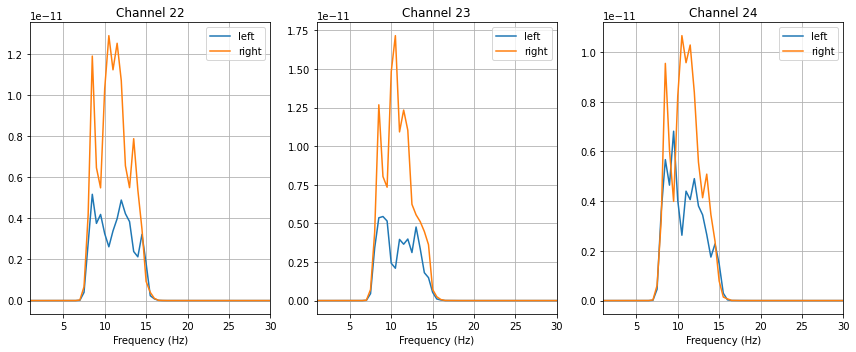

In [70]:
psd_l, freqs = psd(trials_filt[cl1])
psd_r, freqs = psd(trials_filt[cl2])
trials_PSD = {cl1: psd_l, cl2: psd_r} 

plot_psd(
    trials_PSD,
    freqs,
    [channel_names.index(ch) for ch in ['Fp1', 'Fpz', 'Fp2']],
)

In [71]:
#  Como recurso para o classificador, usaremos o logaritmo da variância de cada canal. A função abaixo calcula isso:
# Calculate the log(var) of the trials
def logvar(trials):
    '''
    Calcular log-var de cada canal.
    
    Parametros
    ----------
    trials : 3d-array (channels x samples x trials)
        Sinal EEG .
        
    Retorno
    -------
    logvar - 2d-array (canais x amostras)
        Para cada canal o logvar do sinal
    '''
    return np.log(np.var(trials, axis=1))


# Aplicar a funcao
trials_logvar = {cl1: logvar(trials_filt[cl1]),
                 cl2: logvar(trials_filt[cl2])}


In [72]:
# Abaixo está uma função para visualizar o logvar de cada canal como um gráfico de barras:
def plot_logvar(trials):
    '''
    Plota a log-var de cada canal/componente.
    arguments:
        trials - Dicionario contendo as amostras (log-vars x trials) para 2 classes.
    '''
    plt.figure(figsize=(12,5))
    
    x0 = np.arange(nchannels)
    x1 = np.arange(nchannels) + 0.4

    y0 = np.mean(trials[cl1], axis=1)
    y1 = np.mean(trials[cl2], axis=1)

    plt.bar(x0, y0, width=0.5, color='b')
    plt.bar(x1, y1, width=0.4, color='r')

    plt.xlim(-0.5, nchannels+0.5)

    plt.gca().yaxis.grid(True)
    plt.title('log-var de cada canal/componente')
    plt.xlabel('canais/componentes')
    plt.ylabel('log-var')
    plt.legend(cl_lab)

A maioria dos canais mostra uma pequena diferença no log-var do sinal entre as duas classes.

O próximo passo é passar de 118 canais para apenas algumas combinacoes de canais. 

O algoritmo CSP calcula combinacoes de canais que são projetados para maximizar a diferença de variação entre duas classes.

Essas combinacoes são chamadas de filtros espaciais.

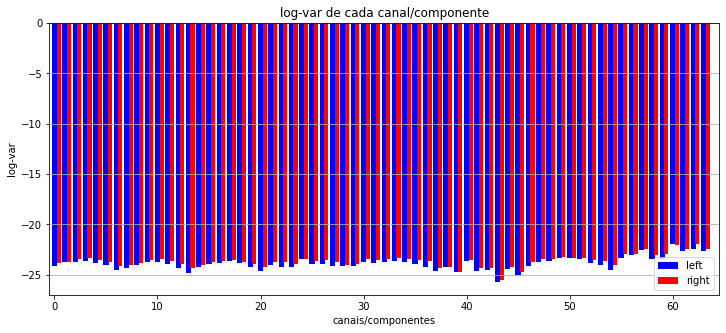

In [73]:
# Plotar log-vars
plot_logvar(trials_logvar)

In [74]:
from numpy import linalg
def cov(trials):
  ''' Calcula a covariancia para cada amostra e retorna as medias respoctivas '''
  ntrials = trials.shape[2]
  covs = [ trials[:,:,i].dot(trials[:,:,i].T) / nsamples for i in range(ntrials) ]
  return np.mean(covs, axis=0)

def whitening(sigma):
  ''' Calcula a matriz "whitening" para a matriz sigma de covariancia. '''
  U, l, _ = linalg.svd(sigma)
  return U.dot( np.diag(l ** -0.5) )

def csp(trials_l, trials_r):
  ''' Calcula a matriz W de transformacao CSP 
    argumentos:
    -------------
      trials_l: array ( canais X testes X amostras ) contendo as amostras de movimento do punho esquerdo
      trials_r: ( canais X testes X amostras ) contendo as amostras de movimento do punho direito
    retorna:
      Matriz W de combinacao
  '''
  cov_l = cov(trials_l)
  cov_r = cov(trials_r)
  P = whitening(cov_l + cov_r)
  B, _, _ = linalg.svd( P.T.dot(cov_r).dot(P) )
  W = P.dot(B)
  return W

def apply_mix(W, trials):
  ''' Aplica uma matriz de combinacao a cada amostra ( basicamente multiplica W com a matriz de sinais EEG ) '''
  ntrials = trials.shape[2]
  trials_csp = np.zeros((nchannels, nsamples, ntrials))
  for i in range(ntrials):
    trials_csp[:,:,i] = W.T.dot(trials[:,:,i])
  return trials_csp





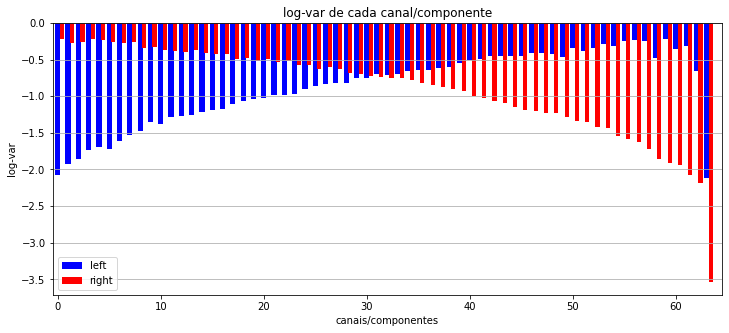

In [75]:
# Aplicar as funcoes
W = csp(trials_filt[cl1], trials_filt[cl2])
trials_csp = {cl1: apply_mix(W, trials_filt[cl1]),
              cl2: apply_mix(W, trials_filt[cl2])}

# Para visualizar os resultados do algoritimo CSP, segue o grafico log-var plotado abaixo
trials_logvar = {cl1: logvar(trials_csp[cl1]),
                  cl2: logvar(trials_csp[cl2])}
plot_logvar(trials_logvar)

Ao invez  de 118 canais, agora temos 118 combinacoes de canais, chamados de componentes, que são o resultado de 118 filtros espaciais aplicados aos dados.

Os primeiros filtros maximizam a variação da primeira classe, enquanto minimizam a variação da segunda. Os últimos filtros maximizam a variação da segunda classe, enquanto minimizam a variação da primeira.

Isso também é visível no  gráfico PSD. O código abaixo plota o PSD para o primeiro e o último componente, bem como um no meio:


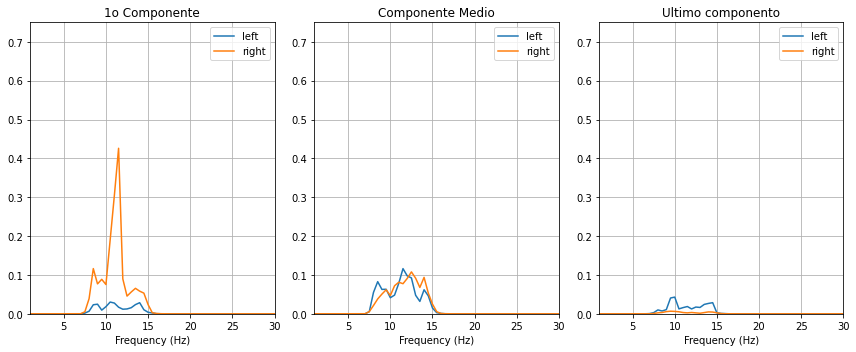

In [76]:
psd_l, freqs = psd(trials_csp[cl1])
psd_r, freqs = psd(trials_csp[cl2])
trials_PSD = {cl1: psd_l, cl2: psd_r}

plot_psd(trials_PSD, freqs, [0,28,-1], chan_lab=['1o Componente', 'Componente Medio', 'Ultimo componento'], maxy=0.75 )

E possivel diferenciar bem as duas classes, o gráfico de dispersão é uma ferramenta útil para visualizar essa diferenca.

Aqui ambas as classes são plotadas em um plano bidimensional: o eixo x é o primeiro componente CSP, o eixo y é o último.


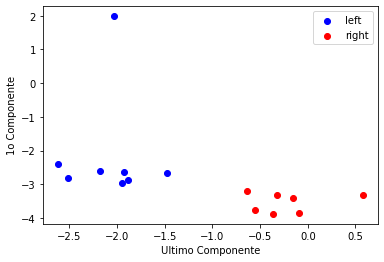

In [77]:
def plot_scatter(left, right):
  plt.figure()
  plt.scatter(left[0,:], left[-1,:], color='b')
  plt.scatter(right[0,:], right[-1,:], color='r')
  plt.xlabel('Ultimo Componente')
  plt.ylabel('1o Componente')
  plt.legend(cl_lab)
  
plot_scatter(trials_logvar[cl1], trials_logvar[cl2])


Aplicar um classificador linear a esses dados. 

Um classificador linear pode ser pensado como desenhar uma linha no gráfico acima para separar as duas classes. Para determinar a classe para uma nova tentativa, apenas verifica-se em qual lado da linha a tentativa estaria se plotada como acima.

Os dados são divididos em amostras de treinamento e um conjunto de teste.
O classificador ajustará um modelo (neste caso, uma linha reta) no conjunto de treinamento e usará esse modelo para fazer previsões sobre o conjunto de teste (veja em qual lado da linha cada tentativa do conjunto de teste cai).

Observe que o algoritmo CSP faz parte do modelo, portanto, por uma questão de justiça, ele deve ser calculado usando apenas os dados de treinamento.

In [90]:
# Porcentagem de amostras para utilizar no treinamento (divisao 50-50 )
train_percentage = 0.3

# Calcular o numero de amostras para cada classe em que a porcentagem acima sirva 
ntrain_l = int(trials_filt[cl1].shape[2] * train_percentage)
ntrain_r = int(trials_filt[cl2].shape[2] * train_percentage)
ntrain_l = trials_filt[cl1].shape[2] - ntrain_l
ntrain_r = trials_filt[cl2].shape[2] - ntrain_r

# Dividindo o sinal filtrado de frequencia num conjunto de treinamento e testes
train = {cl1: trials_filt[cl1][:,:,:ntrain_l],
         cl2: trials_filt[cl2][:,:,:ntrain_r]}

test = {cl1: trials_filt[cl1][:,:,ntrain_l:],
         cl2: trials_filt[cl2][:,:,ntrain_r:]}


# Treinar a CSP com  o conjunto de treinamento somente
W = csp(train[cl1], train[cl2])

# Aplicar a CSP em ambos conjuntos: treinamento e testes
train[cl1] = apply_mix(W, train[cl1])
train[cl2] = apply_mix(W, train[cl2])
test[cl1] = apply_mix(W, test[cl1])
test[cl2] = apply_mix(W, test[cl2])

# Selecionar somente o primeiro e ultimo para classificacao
comp = np.array([0, -1])
train[cl1] = train[cl1][comp,:,:]
train[cl2] = train[cl2][comp,:,:]
test[cl1] = test[cl1][comp,:,:]
test[cl2] = test[cl2][comp,:,:]

# Calcular log-var
train[cl1] = logvar(train[cl1])
train[cl2] = logvar(train[cl2])
test[cl1] = logvar(test[cl1])
test[cl2] = logvar(test[cl2])



Para o classificador será utilizado o algoritmo de Análise Discriminante Linear (LDA).
Ele ajusta uma distribuição gaussiana para cada classe, caracterizada pela média e covariância, e determina um plano de separação ótimo para dividir as duas. Este plano é definido como:
   r = W0*X0 + W1*X1 +...+ WnXn - b, onde:
r é a saída do classificador;  
Wn são os pesos das caracteristicas;
Xn são as caracteristicas das amostras;
n é a dimensao dos dados e;
b é o deslocamento.

Neste caso, temos dados bidimensionais, então o plano de separação será uma linha: 
  r = W0*X0 + W1*X1
Para determinar um rótulo de classe para uma amostra não vista, podemos calcular se o resultado é positivo ou negativo.


In [91]:
def train_lda(class1, class2):
  ''' Treinar o algoritiom LDA
  argumentos:
    class1: array (observacoes X caracteristicas) da classe1
    class2: array (observacoes X caracteristicas) da classe2
  retorna:
    Matriz de projecao W
    Deslocamento b
  '''
  nclasses = 2
  nclass1 = class1.shape[0]
  nclass2 = class2.shape[0]

  # Classe anterior: nester caso, as amostras tem numeros iguais de exemplos para cada classe, 
  # logo ambas as calsses anteriores sao 0.5

  prior1 = nclass1 / float(nclass1 + nclass2)
  prior2 = nclass2 / float(nclass1 + nclass1)

  mean1 = np.mean(class1, axis=0)
  mean2 = np.mean(class2, axis=0)

  class1_centered = class1 - mean1
  class2_centered = class2 - mean2

  # Calcular a covariancia entre as caracteristicas
  cov1 = class1_centered.T.dot(class1_centered) / (nclass1 - nclasses)
  cov2 = class2_centered.T.dot(class2_centered) / (nclass2 - nclasses)

  W = (mean2 - mean1).dot(np.linalg.pinv(prior1*cov1 + prior2*cov2))
  b = (prior1 * mean1 + prior2 * mean2).dot(W)

  return(W,b)


def apply_lda(test, W, b):
  '''Aplicar a LDA previamenter treinada ao novo dado
  argumentos:
    test: array (caracteristicas X amostras) contendo os dados
    W: a matriz projetada W conforme calculada pela funcao tain_lda()
    b: o deslocamento b confirme calculado pela funcao train_lda()
  Retorna:
    Uma lista contendo rotulos de classe para cada amostra
  '''
  ntrials = test.shape[1]
  prediction = []
  for i in  range(ntrials):
    # A linha abaixo e uma generalizacao para: 
    # result = W[0]*test[0,i] + W[1]*test[1,i] - b
    result = W.dot(test[:,i]) - b
    if result <= 0:
      prediction.append(1)
    else:
      prediction.append(2)
  return np.array(prediction)

Ao treinar a LDA utilizando os dados de treinamento, retorna W e b

In [92]:

W,b = train_lda(train[cl1].T, train[cl2].T)
print('W:', W)
print('b:', b)


W: [ 44.25813498 -34.57759553]
b: -19.198800640177872


Como informativo, foi recriado o gráfico de dispersão e sobreposto o limite de decisão conforme determinado pelo classificador LDA. 
O limite de decisão é a linha para a qual a saída do classificador é exatamente zero (0).
O gráfico de dispersão usou 𝑋0 como eixo 𝑥 e 𝑋1 como eixo 𝑦. Para encontrar a função 𝑦=𝑓(𝑥) que descreve o limite de decisão, definimos 𝑟 para 0 e resolvemos para 𝑦 na equação do plano de separação:

<div style="width:600px">
$$\begin{align}
W_0 \cdot X_0 + W_1 \cdot X_1 - b &= r &&\text{a equacao original} \\\
W_0 \cdot x + W_1 \cdot y - b &= 0     &&\text{atribuindo a $X_0=x$, $X_1=y$ e $r=0$} \\\
W_0 \cdot x + W_1 \cdot y &= b         &&\text{resulta em $y$}\\\
W_1 \cdot y &= b - W_0 \cdot x \\\
\\\
y &= \frac{b - W_0 \cdot x}{W_1}
\end{align}$$
</div>

Primeiro traçamos o limite de decisão com os dados de treinamento usados para calculá-lo:

(-2.2, 1.0)

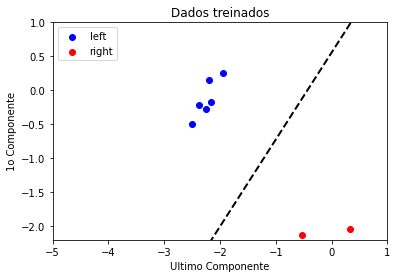

In [93]:
# Scatterplot like before
plot_scatter(train[cl1], train[cl2])
plt.title('Dados treinados')

# Calculate decision boundary (x,y)
x = np.arange(-5, 1, 0.1)
y = (b - W[0]*x) / W[1]

# Plot the decision boundary
plt.plot(x,y, linestyle='--', linewidth=2, color='k')
plt.xlim(-5, 1)
plt.ylim(-2.2, 1)

O código abaixo traça o limite com os dados de teste nos quais aplicaremos o classificador. Você verá que o classificador cometerá alguns erros.

(-2.2, 1.0)

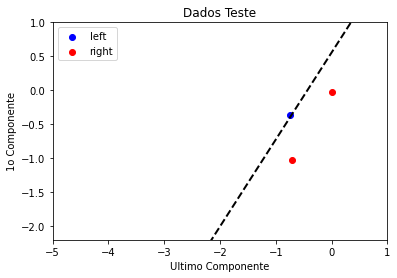

In [94]:
plot_scatter(test[cl1], test[cl2])
plt.title('Dados Teste')
plt.plot(x,y, linestyle='--', linewidth=2, color='k')
plt.xlim(-5, 1)
plt.ylim(-2.2, 1)

Agora o LDA é construído e ajustado aos dados de treinamento. Agora podemos aplicá-lo aos dados de teste. Os resultados são apresentados como uma matriz de confusão:
<table>
    <tr><td></td><td colspan='2' style="font-weight:bold">Rotulos Reais →</td></tr>
    <tr><td style="font-weight:bold">↓ Rotulos Preditivos</td><td>Punho Esquerdo</td><td>Punho Direito</td></tr>
    <tr><td>Punho Esquerdo</td><td></td><td></td></tr>
    <tr><td>Punho Direito</td><td></td><td></td></tr>
</table>

O número na diagonal serão as amostras que foram classificadas corretamente, quaisquer amostras classificadas incorretamente (um falso positivo ou falso negativo) estarão nos cantos.

In [95]:
# Apresentar matriz de confusao
conf = np.array([
    [(apply_lda(test[cl1], W, b) == 1).sum(), (apply_lda(test[cl2], W, b) == 1).sum()],
    [(apply_lda(test[cl1], W, b) == 2).sum(), (apply_lda(test[cl2], W, b) == 2).sum()],
])

print('Matriz de Confusao:')
print(conf)
print()
print('Precisao: %.3f' % (np.sum(np.diag(conf)) / float(np.sum(conf))))

Matriz de Confusao:
[[1 0]
 [1 2]]

Precisao: 0.750


# Resultados de tradução
A matriz de confusão mostra que 4 das 50 tentativas com movimento do pé foram classificadas incorretamente como movimento da mão direita e 5 das 50 tentativas com movimento da mão direita foram classificadas incorretamente como movimento do pé. No total, 91% das tentativas foram classificadas corretamente, não uma pontuação ruim!